In [29]:
import nltk
text = nltk.word_tokenize('And now for something completely different')  # word_tokenize 分词
nltk.pos_tag(text)  # pos_tag 给一组数据打标签,text为列表

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [30]:
taggoed_open = nltk.tag.str2tuple('fly/BZG')
taggoed_open

('fly', 'BZG')

In [31]:
taggoed_open[0]

'fly'

In [33]:
text = "I/1 like/2 English/3 very/4 much/5"
[nltk.tag.str2tuple(s) for s in text.split()]

[('I', '1'), ('like', '2'), ('English', '3'), ('very', '4'), ('much', '5')]

In [36]:
text.split(' .')

['I/1 like/2 English/3 very/4 much/5']

In [37]:
s ="I like English very much"
ss = s.split()
sss = ""
for i in range(0,len(ss)):
    sss = sss+ss[i]+"/"+str(i+1)+" "
sss

'I/1 like/2 English/3 very/4 much/5 '

In [63]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news',tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.keys()

dict_keys(['DET', 'NOUN', 'ADJ', 'VERB', 'ADP', '.', 'ADV', 'CONJ', 'PRT', 'PRON', 'NUM', 'X'])

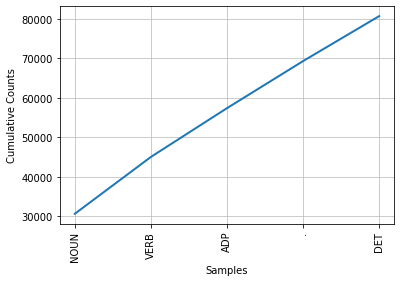

In [74]:
tag_fd.plot(5,cumulative=True)

In [78]:
brown_learned_text = brown.words(categories = "learned")
(sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == "often")))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [81]:
# 指导词性
brown_lrnd_tagged = brown.tagged_words(categories = "learned")
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == "often"]
fd = nltk.FreqDist(tags)
fd.tabulate()

VBN  VB VBD  JJ  IN  QL   ,  CS  RB  AP VBG  RP VBZ QLP BEN WRB   .  TO  HV 
 15  10   8   5   4   3   3   3   3   1   1   1   1   1   1   1   1   1   1 


In [3]:
import nltk
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [4]:
tags = [tag for (word, tag) in brown.tagged_words(categories = "news")]
print(nltk.FreqDist(tags).max())

NN


In [5]:
raw = "I do not like green eggs and ham, I do not like them Sam I am!"
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger("NN")
default_tagger.tag(tokens)

NameError: name 'word_tokenize' is not defined

# 正则表达式标注器

In [6]:
 patterns = [
...     (r'.*ing$', 'VBG'),               
...     (r'.*ed$', 'VBD'),                
...     (r'.*es$', 'VBZ'),                
...     (r'.*ould$', 'MD'),               
...     (r'.*\'s$', 'NN$'),               
...     (r'.*s$', 'NNS'),                
...     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  
...     (r'.*', 'NN')                     
... ]

In [7]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [9]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

# 一元标注器

In [10]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories = "news")
brown_sents = brown.sents(categories = "news")
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

In [11]:
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [24]:
unigram_tagger.evaluate(brown_tagged_sents)

0.6645583467589554

In [25]:
size = int(len(brown_tagged_sents)*0.9)  # 训练数据

In [26]:
size

4160

In [27]:
train_sents = brown_tagged_sents[:size]

In [28]:
test_sents = brown_tagged_sents[size:]

In [29]:
unigram_tagger = nltk.UnigramTagger(train_sents)

In [30]:
unigram_tagger.evaluate(test_sents)

0.8121200039868434

# 一般的N-gram的标注

In [31]:
bigram_tagger = nltk.BigramTagger(train_sents)
print(bigram_tagger.tag(brown_sents[2007]))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


In [32]:
unseen_sent = brown_sents[4203]
print(bigram_tagger.tag(unseen_sent))

[('The', 'AT'), ('population', 'NN'), ('of', 'IN'), ('the', 'AT'), ('Congo', 'NP'), ('is', 'BEZ'), ('13.5', None), ('million', None), (',', None), ('divided', None), ('into', None), ('at', None), ('least', None), ('seven', None), ('major', None), ('``', None), ('culture', None), ('clusters', None), ("''", None), ('and', None), ('innumerable', None), ('tribes', None), ('speaking', None), ('400', None), ('separate', None), ('dialects', None), ('.', None)]


In [33]:
print(bigram_tagger.evaluate(test_sents))

0.10206319146815508
